# Arbitrage Pairs Trading 

This Python project investigates pairs trading through a class-based methodology. We will use pandas for data manipulation, matplotlib and seaborn for data visualization, sklearn for regression, and statsmodels for statistical testing.

# Imports 

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
import yfinance as yf

# Set the aesthetic style of the plots
sns.set_style("darkgrid")
     

# Defining Class for Pairs Trading

Pairs trading functionality is encapsulated in the PairsTrade class:

Download Data: Retrieve past pricing with Yahoo Finance.
Calculate Spread: Determine the hedging ratio and compute the spread using linear regression.
Check Stationarity: Perform the Augmented Dickey-Fuller (ADF) test to check if the spread is stationary.
Plot Data: Visualize historical prices and the spread.
Definitions:

In [ ]:
Pairs Trading: A market-neutral strategy involving matching a long position with a short position in a pair of highly correlated stocks.
Hedge Ratio: The ratio used to maintain a market-neutral position (found through an OLS linear regression)

In [5]:
class PairsTrade:

    def __init__(self, ticker_list, start_date, end_date, thresh='5%', max_lag=1):
        """
        Initialize the PairsTrade class.

        Parameters:
        ticker_list (list): List of tickers (strings).
        start_date (str): Start date for data (format 'YYYY-MM-DD').
        end_date (str): End date for data (format 'YYYY-MM-DD').
        thresh (str): Threshold for ADF test (default '5%').
        max_lag (int): Max lag for ADF test (default 1).
        """
        self.ticker_list = ticker_list
        self.start_date = start_date
        self.end_date = end_date
        self.thresh = thresh
        self.max_lag = max_lag
        self.df = self.download_data()
        self.hedge_ratio = self.spread_calc()
        self.is_stationary = self.check_stationary()

    def download_data(self):
        """
        Download data for the given tickers.

        Returns:
        DataFrame: DataFrame containing the asset prices.
        """
        df = pd.DataFrame()
        for ticker in self.ticker_list:
            data = yf.download(ticker, start=self.start_date, end=self.end_date)
            df[ticker] = data['Close']
        df = df.dropna()
        return df

    def spread_calc(self):
        """
        Calculate the spread of the pairs using linear regression.

        Returns:
        float: Hedge ratio.
        """
        model = LinearRegression().fit(self.df[self.ticker_list[1]].values.reshape(-1, 1), self.df[self.ticker_list[0]].values)
        hedge_ratio = model.coef_[0]
        self.df['spread'] = self.df[self.ticker_list[0]] - hedge_ratio * self.df[self.ticker_list[1]]
        return hedge_ratio

    def plot_data(self):
        """
        Plot the price data of the tickers.
        """
        plt.figure(figsize=(18, 10))
        sns.lineplot(data=self.df[self.ticker_list])
        plt.title(f'Price of {self.ticker_list[0]} and {self.ticker_list[1]}')
        plt.show()

    def plot_spread(self, plot_price=False):
        """
        Plot the spread (and prices if specified).

        Parameters:
        plot_price (bool): Whether to plot prices along with the spread (default False).
        """
        if plot_price:
            fig, ax = plt.subplots(nrows=2, figsize=(18, 10))
            sns.lineplot(data=self.df['spread'], ax=ax[0])
            ax[0].set_title(f'Spread of {self.ticker_list[0]} - {self.hedge_ratio:.2f} * {self.ticker_list[1]}')
            sns.lineplot(data=self.df[self.ticker_list], ax=ax[1])
            ax[1].set_title('Price')
            ax[1].legend(self.ticker_list)
        else:
            plt.figure(figsize=(18, 10))
            sns.lineplot(data=self.df['spread'])
            plt.title(f'Spread of {self.ticker_list[0]} - {self.hedge_ratio:.2f} * {self.ticker_list[1]}')
            plt.ylabel('Spread')
            plt.show()

    def check_stationary(self):
        """
        Check if the spread is stationary using ADF test.

        Returns:
        bool: True if the spread is stationary, False otherwise.
        """
        adf_result = adfuller(self.df['spread'], maxlag=self.max_lag)
        test_stat = adf_result[0]
        t_stat = adf_result[4][self.thresh]
        return test_stat < t_stat

# Initializing the PairsTrade Class and Plotting

With the tickers for SPY and QQQ, create an instance of the PairsTrade class and set the date range for historical data. The data will be downloaded automatically, and the class will run preliminary computations.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


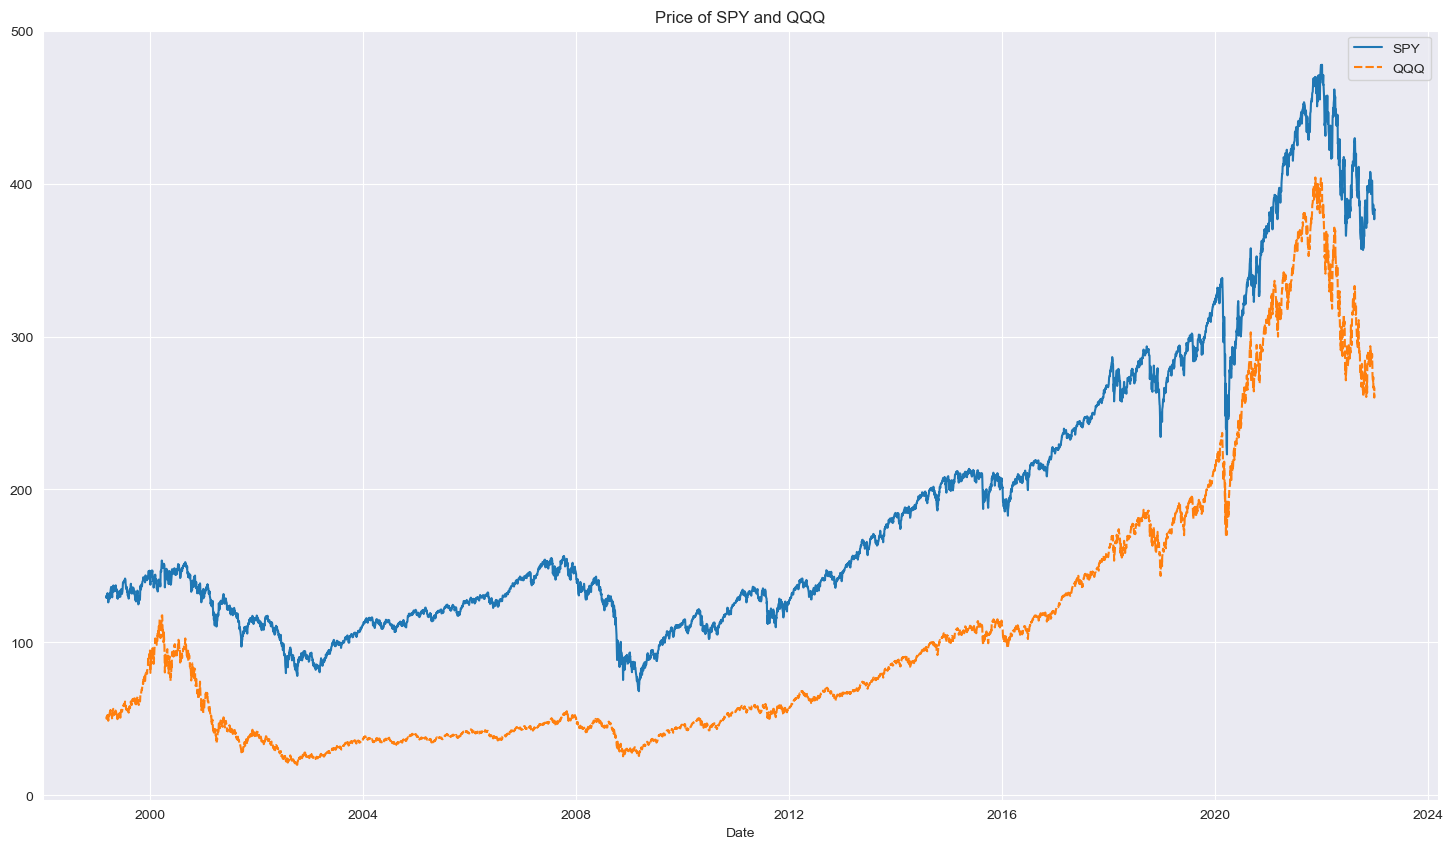

In [6]:
# Initialize the PairsTrade class
pairs_trade = PairsTrade(['SPY', 'QQQ'], start_date='1999-01-01', end_date='2023-01-01')

# Plot the price data
pairs_trade.plot_data()


Is the spread stationary? False


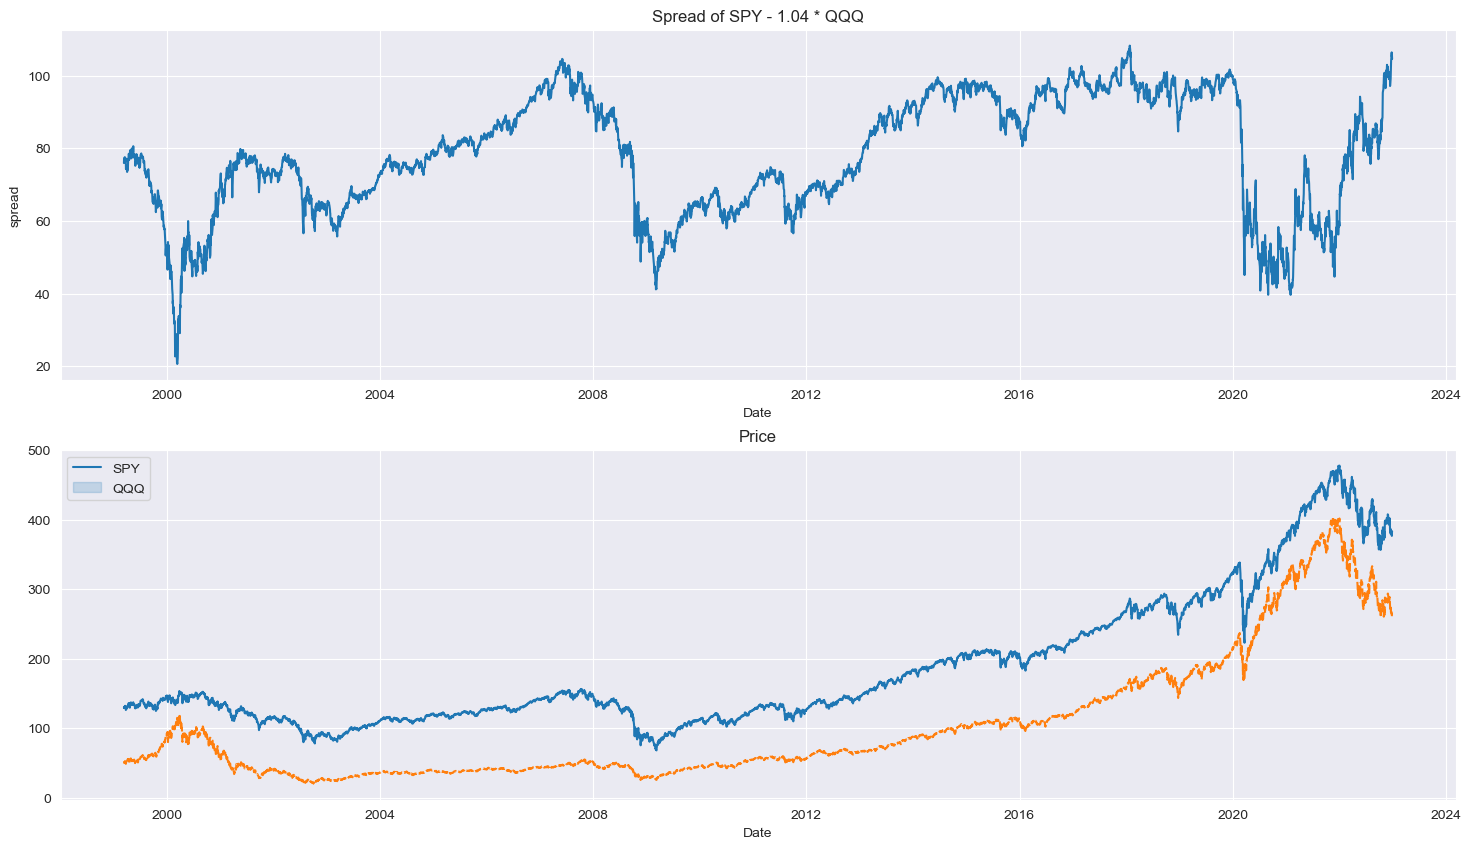

In [7]:
# Plot the spread with prices
pairs_trade.plot_spread(plot_price=True)

# Print if the spread is stationary
print('Is the spread stationary?', pairs_trade.is_stationary)


In [ ]:
3. Calculate the Spread and Check for Stationarity
Calculate the spread between two assets by performing a linear regression:
    
    spread = P1 - beta*P2

where P1 and P2 are the prices of the two assets, and ( \beta ) is the hedge ratio. 
The hedge ratio is obtained by regressing the price of one asset against the other: 
    
    P1 = alpha + beta*P2 + e
    alpha = intercept
    beta = slope coefficient / hedge ratio
    e = error term

The hedge ratio beta represents the amount of asset P2 needed to hedge against the price movements of asset P1

The ADF test checks if the spread is stationary by testing the null hypothesis that a unit root is present. 
If the test statistic is less than the critical value, the null hypothesis is rejected, indicating that the spread is stationary.

In [8]:
print('Hedge Ratio:', pairs_trade.hedge_ratio)
print('Is the spread stationary?', pairs_trade.is_stationary)


Hedge Ratio: 1.0434447355593648
Is the spread stationary? False


# Conclusion

By taking use of statistical correlations between asset pairs, pairs trading provides a successful market-neutral approach. Cointegration and stationarity are the theoretical underpinnings of pairs trading. Despite any short-term fluctuations, cointegration indicates that two asset prices have a long-term equilibrium relationship. Finding stationary spreads allows one to profit from this relationship.

## Theory and Practical Implications

The idea of mean reversion is central to the basic philosophy of pairs trading. The price spread of two assets will oscillate around a mean if they are cointegrated. When the spread returns to its mean, we can profit from trading on these swings. Because financial markets frequently display mean-reverting behavior as a result of elements like arbitrage opportunities and market efficiency, this hypothesis is sound.

Cointegration and stochastic processes are central to the theory underlying pairs trading. Despite short-term fluctuations, two asset prices that are cointegrated have a long-term equilibrium relationship in their price movements. The Ornstein-Uhlenbeck process, a kind of stochastic process that represents mean-reverting behavior, can be used to mimic this:
